In [331]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [332]:
def flipHorizontal(kernel):
    i = 0 #first column
    j = kernel.shape[1] - 1 #last column
    while True:
        if i == j: #while center is not reached
            break
        else:
            for c in range(kernel.shape[0]): #for each value in columns
                kernel[c][i], kernel[c][j] = kernel[c][j], kernel[c][i] #Swapping
            i = i + 1 #move to new column from start
            j = j - 1 #come back to a new column from end 
    return kernel

def flipVertical(kernel):
    i = 0 #first row
    j = kernel.shape[0] - 1 #last row
    while True:
        if i == j: #while center is not reached
            break
        else:
            for c in range(kernel.shape[1]): #for each value in rows
                kernel[i][c], kernel[j][c] = kernel[j][c], kernel[i][c] #Swapping
            i = i + 1 #move to the new row from start
            j = j - 1 #come back to a new row from end
    return kernel

def flip(kernel):
    kernel = flipHorizontal(kernel)
    kernel = flipVertical(kernel)
    return kernel

In [333]:
def multiply(A,B): #multiply two matrices, 
    ans = 0
    for i in range(A.shape[0]):
        for j in range(A.shape[0]):
            ans += A[i,j] * B[i,j] #multiply same indexex and add all of them
    return ans

In [334]:
def normalizeImage(image): #normalize an image
    image[:,:,0] = normalize(image[:,:,0]) #normalize red_channel
    image[:,:,1] = normalize(image[:,:,1]) #normalize green_channel
    image[:,:,2] = normalize(image[:,:,2]) #normalize blue_channel
    return image

def normalize(image):
    maxV = image.max()
    minV = image.min()
    for i in range(0,image.shape[0]):
        for j in range(0,image.shape[1]):
            image[i,j] = ((image[i,j]-minV)*255)/(maxV-minV)
    return image

In [335]:
def convolution(image,kernel):
    tempImg = np.zeros(shape=image.shape) #Convoluted Image
    count = int(kernel.shape[0]/2) #Count of rows & columns to be padded
    for c in range(count): #padding rows and columns
        image = np.concatenate((np.zeros((image.shape[0],1), dtype=int), image), axis=1)
        image = np.concatenate((np.zeros((1,image.shape[1]), dtype=int), image), axis=0)
        image = np.append(image, np.zeros((1,image.shape[1]), dtype=int), axis=0)
        image = np.append(image, np.zeros((image.shape[0],1), dtype=int), axis=1)
    x,y = 0,0 #To store new values
    for i in range(0 + count,image.shape[0] - count):
        for j in range(0 + count, image.shape[1] - count):
            A = image[i-count:i+(count+1),j-count:j+(count+1)] #Extract image sub matrix that is required to multiply
            tempImg[x,y] = multiply(A,kernel) #Multiply it with kernel and store the result in new image
            y = y + 1 #move to the next column
        x = x + 1 #move to the next row
        y = 0 
    return tempImg

In [336]:
def filter(image,kernel):
    newImg = np.zeros(shape=image.shape,dtype=int) #Filtered Image
    kernel = flip(kernel) #Flipped Kernel
    newImg[:,:,0] = convolution(image[:,:,0],kernel) 
    newImg[:,:,1] = convolution(image[:,:,1],kernel)
    newImg[:,:,2] = convolution(image[:,:,2],kernel)
    return newImg

In [337]:
def RGB2BGR(image): #Converting RGB image to BGR (required for cv2.write)
    newImage = image.copy()
    newImage[:,:,0], newImage[:,:,2] = newImage[:,:,2].copy(), newImage[:,:,0].copy()
    return newImage

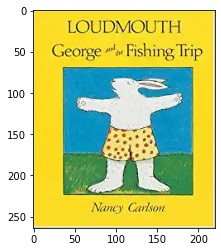

In [338]:
image = cv2.imread('book.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

# Part a) Smoothing (3 x 3 , 5 x 5, 7 x 7)

# 3 by 3

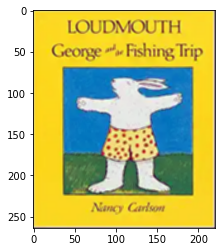

In [339]:
kernel3x3 = np.ones((3, 3),np.float32)/9
smoothImage3x3 = normalizeImage(filter(image,kernel3x3))
smoothImage3x3 = smoothImage3x3.astype(int)
plt.imshow(smoothImage3x3)

# 5 by 5

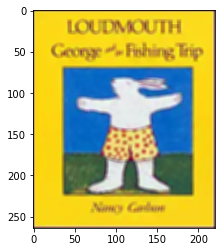

In [340]:
kernel5x5= np.ones((5,5),np.float32)/25
smoothImage5x5 = normalizeImage(filter(image,kernel5x5))
plt.imshow(smoothImage5x5)

# 7 by 7

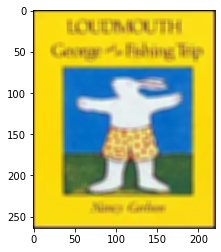

In [341]:
kernel7x7=np.ones((7,7),np.float32)/49
smoothImage7x7 = normalizeImage(filter(image,kernel7x7))
plt.imshow(smoothImage7x7)

In [342]:
cv2.imwrite('BSEF19M007_SMOOTH_3X3.png',RGB2BGR(smoothImage3x3))
cv2.imwrite('BSEF19M007_SMOOTH_5X5.png',RGB2BGR(smoothImage5x5))
cv2.imwrite('BSEF19M007_SMOOTH_7X7.png',RGB2BGR(smoothImage7x7))

True

# Part b) Sharpening (3 x 3)

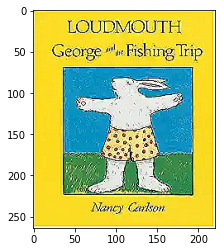

In [343]:
kernel3x3sharp = np.array([[0, -1,  0],[-1,  5, -1],[0, -1,  0]])
sharpImage3x3 = filter(image,kernel3x3sharp)
sharpImage3x3 = np.clip(sharpImage3x3,0,255)
sharpImage3x3 = sharpImage3x3.astype(int)
plt.imshow(sharpImage3x3)

In [344]:
cv2.imwrite('BSEF19M007_SHARP_3X3.png', RGB2BGR(sharpImage3x3))

True